In [1]:
import seaborn as sns
import pandas as pd
from pathlib import Path
from loguru import logger
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import tomllib

configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)
datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning(
        "Datafile does not exist. First run src/preprocess.py, and check the timestamp!"
    )
df = pd.read_parquet(datafile)
df.head()

,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week,msg_length
0,2023-02-01 19:59:48+00:00,"Dank voor bericht, Marijke",kooky-tapir,False,False,26,False,evening,19:59:48,2,26
1,2023-02-01 20:46:43+00:00,"Herman goede avond, Mag ik de telefoon nummer...",dynamic-frog,False,False,87,False,evening,20:46:43,2,87
2,2023-02-01 20:52:10+00:00,Voor Ista metertje: 010 2455700,intense-toad,False,True,31,False,evening,20:52:10,2,31
3,2023-02-01 20:52:45+00:00,"Dit gaat dus via Ista, niet via De Combi",intense-toad,False,True,40,False,evening,20:52:45,2,40
4,2023-02-01 20:55:55+00:00,Bedankt Herman 👍🏽🙏🏽,dynamic-frog,True,False,19,False,evening,20:55:55,2,19


In [3]:
def convert_to_decimal_hours(timestamp):
    dec_hour = timestamp.hour + timestamp.minute / 60 + timestamp.second / 3600
    return dec_hour


df["hour"] = df["timestamp"].apply(convert_to_decimal_hours)
df["log_len"] = df["message_length"].apply(lambda x: np.log(x))
df.head()

,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week,msg_length,log_len
0,2023-02-01 19:59:48+00:00,"Dank voor bericht, Marijke",kooky-tapir,False,False,26,False,evening,19.996667,2,26,3.258097
1,2023-02-01 20:46:43+00:00,"Herman goede avond, Mag ik de telefoon nummer...",dynamic-frog,False,False,87,False,evening,20.778611,2,87,4.465908
2,2023-02-01 20:52:10+00:00,Voor Ista metertje: 010 2455700,intense-toad,False,True,31,False,evening,20.869444,2,31,3.433987
3,2023-02-01 20:52:45+00:00,"Dit gaat dus via Ista, niet via De Combi",intense-toad,False,True,40,False,evening,20.879167,2,40,3.688879
4,2023-02-01 20:55:55+00:00,Bedankt Herman 👍🏽🙏🏽,dynamic-frog,True,False,19,False,evening,20.931944,2,19,2.944439


<Axes: xlabel='hour', ylabel='log_len'>

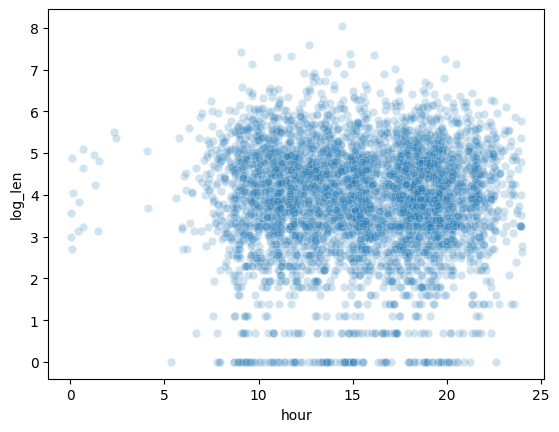

In [4]:
sns.scatterplot(data=df, x="hour", y="log_len", alpha=0.2)

,message_length,has_emoji,count
author,,,
bold-bison,67.146341,0.317073,82
bouncy-worm,42.057143,0.028571,35
cackling-eland,126.698113,0.245283,106
captivating-dove,86.250000,0.687500,16
carefree-lark,78.679803,0.325123,203
cheerful-boar,123.150000,0.350000,20
cheerful-mule,64.219653,0.543353,173
chuckling-stork,93.166667,0.000000,12
coltish-owl,97.761905,0.000000,21


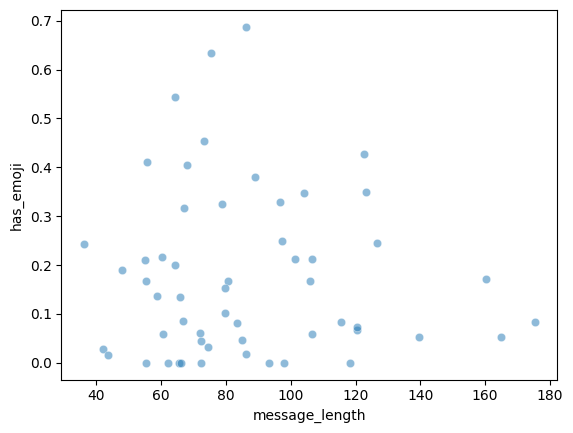

In [5]:
p = (
    df.groupby(["author"])
    .agg({"message_length": "mean", "has_emoji": "mean", "author": "count"})
    .rename(columns={"author": "count"})
)

p = p[p["count"] > 10]
sns.scatterplot(data=p, x="message_length", y="has_emoji", alpha=0.5)
p

<Axes: xlabel='message_length', ylabel='has_emoji'>

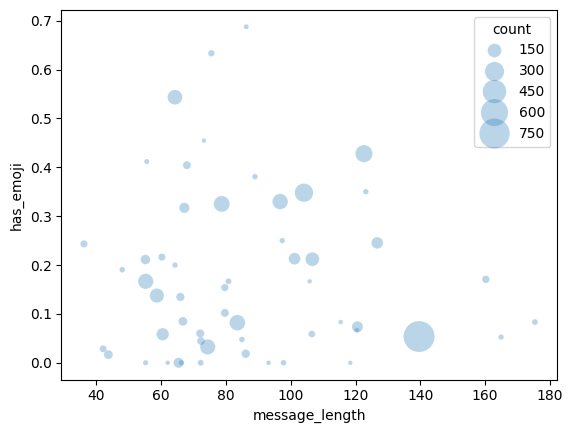

In [6]:
sns.scatterplot(
    data=p, x="message_length", y="has_emoji", size="count", sizes=(10, 500), alpha=0.3
)

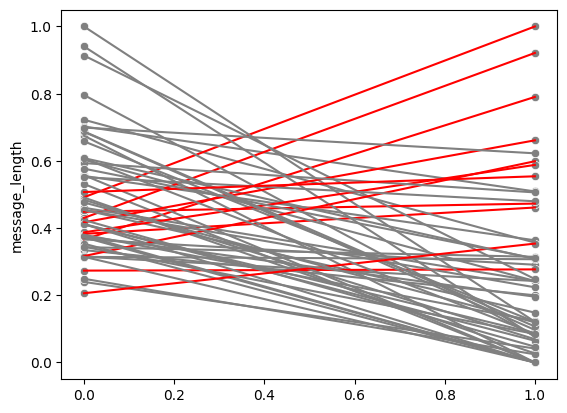

In [7]:
p["message_length"] /= p["message_length"].max()
p["has_emoji"] /= p["has_emoji"].max()
p["color"] = p.apply(
    lambda x: "grey" if x["message_length"] > x["has_emoji"] else "red", axis=1
)

sns.scatterplot(data=p, y="message_length", x=0, color="grey")
sns.scatterplot(data=p, y="has_emoji", x=1, color="grey")
for index, row in p.iterrows():
    sns.lineplot(
        x=[0, 1], y=[row["message_length"], row["has_emoji"]], color=row["color"]
    )

# The map is not the terrain

A model is always an inaccurate representation of reality. That is not a problem, but a useful feature: the simplification of reality allows us to spot patterns and trends that might otherwise be lost in the details.

The problem is that simplifying reality always carries the risk of bending the truth to fit your story, but it isn't always obvious which model is the "best". 

In [8]:
from mads_datasets import DatasetFactoryProvider, DatasetType

penguinsdataset = DatasetFactoryProvider.create_factory(DatasetType.PENGUINS)
penguinsdataset.download_data()

df = pd.read_parquet(penguinsdataset.filepath)
select = [
    "Species",
    "Island",
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
    "Delta 15 N (o/oo)",
    "Delta 13 C (o/oo)",
    "Sex",
    "Body Mass (g)",
]
subset = df[select].dropna()

2025-09-30 18:54:47.160 | INFO     | mads_datasets.base:download_data:121 - Folder already exists at /Users/luiginocleofa/.cache/mads_datasets/penguins
2025-09-30 18:54:47.161 | INFO     | mads_datasets.base:download_data:124 - File already exists at /Users/luiginocleofa/.cache/mads_datasets/penguins/penguins.parq


In [9]:
subset

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Sex,Body Mass (g)
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,8.94956,-24.69454,FEMALE,3800.0
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,8.36821,-25.33302,FEMALE,3250.0
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,8.76651,-25.32426,FEMALE,3450.0
5,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.3,20.6,190.0,8.66496,-25.29805,MALE,3650.0
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,38.9,17.8,181.0,9.18718,-25.21799,FEMALE,3625.0
...,...,...,...,...,...,...,...,...,...
339,Chinstrap penguin (Pygoscelis antarctica),Dream,55.8,19.8,207.0,9.70465,-24.53494,MALE,4000.0
340,Chinstrap penguin (Pygoscelis antarctica),Dream,43.5,18.1,202.0,9.37608,-24.40753,FEMALE,3400.0
341,Chinstrap penguin (Pygoscelis antarctica),Dream,49.6,18.2,193.0,9.46180,-24.70615,MALE,3775.0
342,Chinstrap penguin (Pygoscelis antarctica),Dream,50.8,19.0,210.0,9.98044,-24.68741,MALE,4100.0


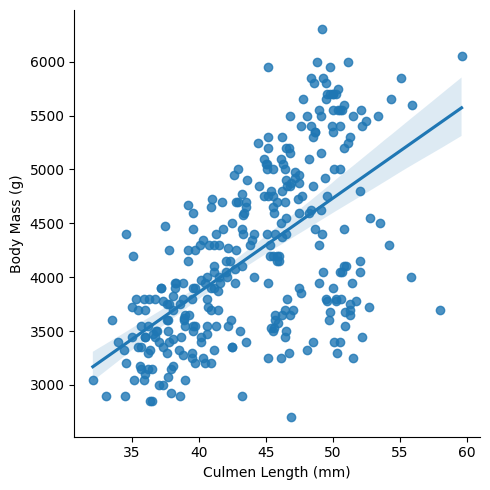

In [10]:
sns.lmplot(data=subset, x="Culmen Length (mm)", y="Body Mass (g)", fit_reg=True)

In [11]:
from scipy import stats

x = subset["Culmen Length (mm)"]
y = subset["Body Mass (g)"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"The model is y = {slope:.2f}x + {intercept:.2f}, with R^2 = {r_value**2:.2f}")

The model is y = 87.37x + 364.81, with R^2 = 0.35


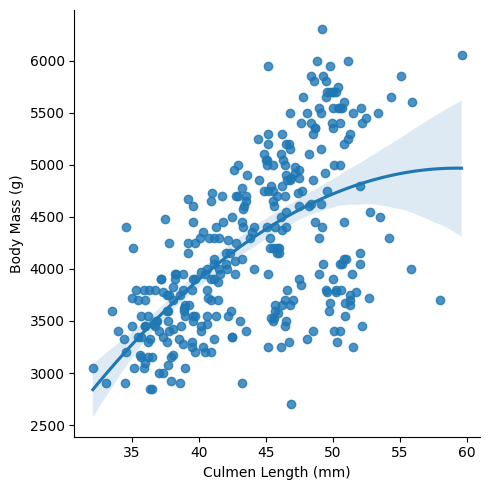

In [12]:
sns.lmplot(data=subset, x="Culmen Length (mm)", y="Body Mass (g)", order=2)

In [13]:
model = np.polyfit(x, y, 2)
print(f"The model is {model[0]:.2f}x^2 + {model[1]:.2f}x + {model[2]:.2f}")

The model is -2.88x^2 + 341.32x + -5149.05


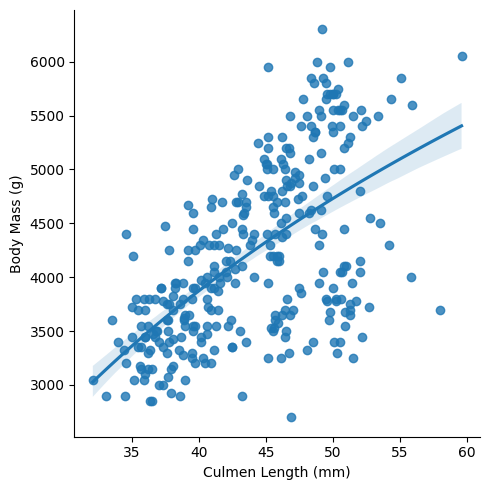

In [14]:
sns.lmplot(data=subset, x="Culmen Length (mm)", y="Body Mass (g)", logx=True)

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(x), y)
print(
    f"The model is y = {slope:.2f} log(x) + {intercept:.2f}, with R^2 = {r_value**2:.2f}"
)

The model is y = 3840.24 log(x) + -10292.81, with R^2 = 0.36


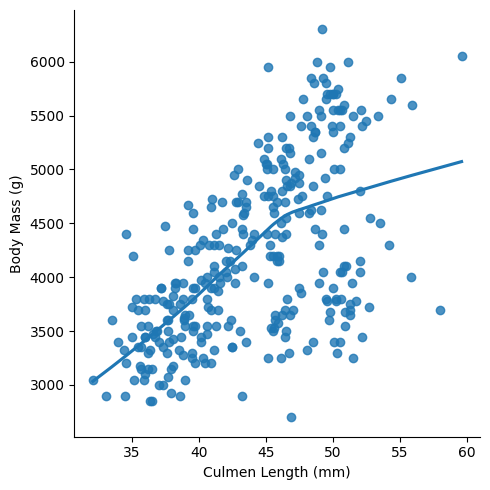

In [16]:
sns.lmplot(data=subset, x="Culmen Length (mm)", y="Body Mass (g)", lowess=True)

Lowess stands for Locally Weighted Scatterplot Smoothing, and it is a non-parametric regression method that fits a smooth curve to the data. It is a useful tool to explore the relationship between two variables, but it is not a model in the traditional sense. It is a tool to help us understand the data, not to make predictions.